## Images
Images are nothing more than arrays, black and white images are 2D arrays containing x and y values of brightness. Color images are 3D images with RGB values ie 3 values each representing the amount of red, green and blue in the image.

Let's start by creating an image by ourselves!

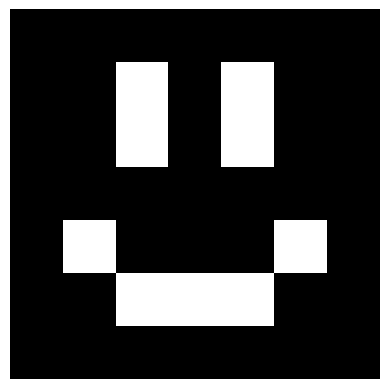

In [4]:
import matplotlib.pyplot as plt

image = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 1, 0, 1, 0, 0],
         [0, 0, 1, 0, 1, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 1, 0],
         [0, 0, 1, 1, 1, 0, 0],
         [0, 0, 0, 0, 0, 0, 0]]

plt.imshow(image, cmap='gray', interpolation='nearest')
plt.axis('off')  # Hide axes
plt.show()

Since we know that images are but arrays we can now work with them! Lets take a picture:

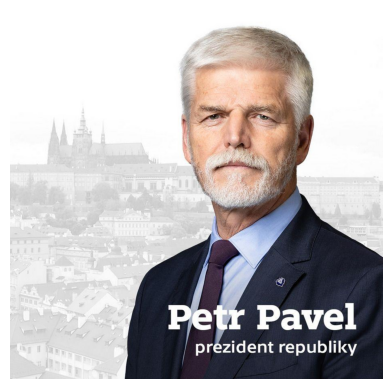

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Replace with your image file path
image_path = "president.jpg"

# Load the image
img = mpimg.imread(image_path)

# Plot the image
plt.imshow(img)
plt.axis('off')  # Hide axes for cleaner display
plt.show()




And let's try some kernel operations that can be found in AI or in image processing

A single neuron in CNN (convolutional neural network) is a kernel. A matrix with numbers. There are many types of kernels, down here, you can try to detect either horizontal or vertical edge using the following:

here this is a horizontal edge detector, it will detect horizontal edges:
```
kernel = np.array([[-1, -2, -1],
                    [0, 0, 0, ],
                    [1, 2, 1]])
```

here is a vertical edge detector, it will detect vertical edges:
```
kernel = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
```

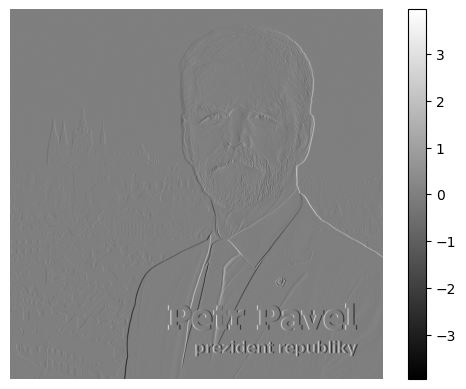

In [34]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

kernel = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

def apply_kernel_on_segment(kernel, segment):
    return np.sum(kernel * segment)

def apply_kernel_on_image(kernel, image):
    # image: H x W x C (RGB)
    # convert to grayscale
    gray = image.mean(axis=2)

    kh, kw = kernel.shape
    H, W = gray.shape
    out_h = H - kh + 1
    out_w = W - kw + 1

    output = np.zeros((out_h, out_w), dtype=float)

    for i in range(out_h):
        for j in range(out_w):
            patch = gray[i:i+kh, j:j+kw]
            output[i, j] = apply_kernel_on_segment(kernel, patch)

    return output

image = mpimg.imread("president.jpg").astype(float)
if image.max() > 1.0:
    image /= 255.0

feature_map = apply_kernel_on_image(kernel, image)

plt.imshow(feature_map, cmap='gray')
plt.colorbar()
plt.axis('off')
plt.show()


You can have a kernel that will detect edges in all directions

```
kernel = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])
```

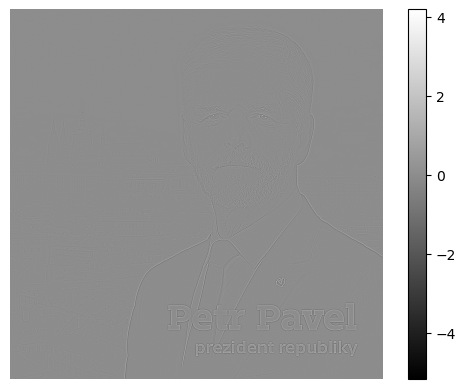

In [32]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

kernel = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])

def apply_kernel_on_segment(kernel, segment):
    return np.sum(kernel * segment)

def apply_kernel_on_image(kernel, image):
    # image: H x W x C (RGB)
    # convert to grayscale
    gray = image.mean(axis=2)

    kh, kw = kernel.shape
    H, W = gray.shape
    out_h = H - kh + 1
    out_w = W - kw + 1

    output = np.zeros((out_h, out_w), dtype=float)

    for i in range(out_h):
        for j in range(out_w):
            patch = gray[i:i+kh, j:j+kw]
            output[i, j] = apply_kernel_on_segment(kernel, patch)

    return output

image = mpimg.imread("president.jpg").astype(float)
if image.max() > 1.0:
    image /= 255.0

feature_map = apply_kernel_on_image(kernel, image)

plt.imshow(feature_map, cmap='gray')
plt.colorbar()
plt.axis('off')
plt.show()
